# **Perceptron de Múltiplas Camadas**

Implemente uma rede perceptron de múltiplas camadas e utilize-a para aproximar as funções abaixo. Em seguida, compare os resultados com as curvas exatas. No caso das letras (b) e (c), apresente também a curva do erro médio de treinamento com relação ao número de épocas e a curva do erro médio com o conjunto de validação.

**a) a função lógica XOR**

b) f(x) = log₁₀(x), onde 1 ≤ x ≤ 10

c) f(x) = 10x⁵+5x⁴+2x³–0.5x²+3x+2, onde 0 ≤ x ≤ 20

**Importando as bibliotecas**

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score
import matplotlib.pyplot as plt

# **Parte 1 - Processamento dos Dados**

**Criando o dataset**

In [ ]:
X = np.array([[0, 0],[0, 1],[1, 0],[1, 1]])
Y = np.array([[0], [1], [1], [0]])

**Dividindo o conjunto de dados em conjunto de treinamento e conjunto de teste**

In [ ]:
x_train, x_test, y_train, y_test = X, X, Y, Y

**Padronização dos dados**

In [ ]:
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

# **Parte 2 - Construção da Rede**

In [ ]:
model = tf.keras.models.Sequential([ 
               tf.keras.layers.Dense(units=4, activation = 'relu', input_dim=2),
               tf.keras.layers.Dense(units=2, activation = 'relu'),
                          
               tf.keras.layers.Dense(units=1, activation='sigmoid')])

# **Parte 3 - Treinando a Rede**

In [ ]:
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 4)                 12        
                                                                 
 dense_1 (Dense)             (None, 2)                 10        
                                                                 
 dense_2 (Dense)             (None, 1)                 3         
                                                                 
Total params: 25
Trainable params: 25
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = model.fit(x_train, y_train, batch_size = 1, epochs = 1000, verbose=1)

Epoch 1/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.6366 - accuracy: 0.5000
Epoch 2/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.6347 - accuracy: 0.5000
Epoch 3/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.6337 - accuracy: 0.5000
Epoch 4/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.6323 - accuracy: 0.2500
Epoch 5/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.6308 - accuracy: 0.5000
Epoch 6/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.6292 - accuracy: 0.5000
Epoch 7/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.6279 - accuracy: 0.5000
Epoch 8/1000
4/4 [==============================] - 0s 6ms/step - loss: 0.6267 - accuracy: 0.5000
Epoch 9/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.6250 - accuracy: 0.5000
Epoch 10/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.6239 - accuracy: 0.5000
Epoch 11/1000
4/4 [

# **Parte 4 - Avaliando o Modelo**

**Verificando o conjunto de testes**

In [ ]:
y_pred = model.predict(x_test)
y_pred = (y_pred > 0.5)

**Matriz de confusão e acurácia**

In [ ]:
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[2 0]
 [0 2]]


1.0

**Gráfico de perda**

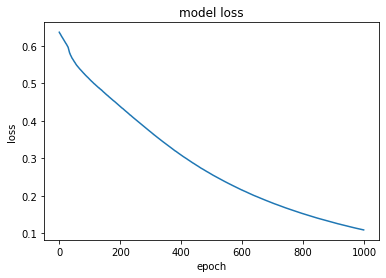

In [ ]:
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()